In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


Question 1 : If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

In [5]:
#removing the categorical variables from datset as they will not be needed in the model
num_df = train_df.select_dtypes(exclude=['object'])
num_df.shape

(4209, 370)

In [6]:
zero_variance_df = num_df.loc[:, num_df.var() == 0.0]
print("ZeroVariance_df_shape:",zero_variance_df.shape)

zero_variance_df.head()

ZeroVariance_df_shape: (4209, 12)


,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
zero_variance_df.columns

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

From the above we come to know that 12 columns have ZERO VARIANCE

In [8]:
#dropping them from train_df
train_df.drop(['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297', 'X330','X347'],axis=1,inplace=True)
train_df.shape

(4209, 366)

Question 2: Check for NULL and UNIQUE values in train and test datasets

In [9]:
print("Null values in train dataset:",train_df.isna().sum().sum())
print("Null values in train dataset:",test_df.isna().sum().sum())

Null values in train dataset: 0
Null values in train dataset: 0


In [10]:
#unique values
train_df.columns.unique()

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)

In [11]:
columns=[]
counts=[]
unique=[]
colm = train_df.columns
for i in colm:
    columns.append(i)
    a=train_df[i].nunique()
    counts.append(a)
    b=train_df[i].nunique()
    unique.append(b)
    print("The no. of unique values of {} columns is = {} \n & unique values of {} columns is =\n {} \n".format(i,train_df[i].nunique(),i,train_df[i].unique()))

The no. of unique values of ID columns is = 4209 
 & unique values of ID columns is =
 [   0    6    7 ... 8412 8415 8417] 

The no. of unique values of y columns is = 2545 
 & unique values of y columns is =
 [130.81  88.53  76.26 ...  85.71 108.77  87.48] 

The no. of unique values of X0 columns is = 47 
 & unique values of X0 columns is =
 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 

The no. of unique values of X1 columns is = 27 
 & unique values of X1 columns is =
 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 

The no. of unique values of X2 columns is = 44 
 & unique values of X2 columns is =
 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah

In [12]:
test_df.columns.unique()

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [13]:
columns_test=[]
counts_test=[]
unique_test=[]
colm = test_df.columns
for i in colm:
    columns_test.append(i)
    a=test_df[i].nunique()
    counts_test.append(a)
    b=test_df[i].nunique()
    unique.append(b)
    print("The no. of unique values of {} columns is = {} \n & unique values of {} columns is =\n {} \n".format(i,test_df[i].nunique(),i,test_df[i].unique()))

The no. of unique values of ID columns is = 4209 
 & unique values of ID columns is =
 [   1    2    3 ... 8413 8414 8416] 

The no. of unique values of X0 columns is = 49 
 & unique values of X0 columns is =
 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb'] 

The no. of unique values of X1 columns is = 27 
 & unique values of X1 columns is =
 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab'] 

The no. of unique values of X2 columns is = 45 
 & unique values of X2 columns is =
 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u'] 

The no. of unique values of X3 columns is = 7 
 & unique values of X3

DATA CLEANSING FOR MODEL DEVELOPMENT

In [14]:
# extracting ['y'] into an array (target array)
y_train = train_df['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [15]:
# Extracting only the coulumns need for machine learing for x_train
usable_columns = list(set(train_df.columns) - set(['ID', 'y']))
x_train = train_df[usable_columns]

In [16]:
# droping ['ID'] from test data as it is not neeeded for machine learning
test_df=test_df.drop('ID', axis=1)

In [17]:
# Extracting only the coulumns need for machine learing for x_test
x_test = test_df[usable_columns]

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(4209, 364)
(4209,)
(4209, 364)


In [19]:
# creating function for checking missing values
def check_missing_values(df):
    if df.isnull().any().any():
        print('There are missing values in the dataframe')
    else:
            print('There are no missing values in the dataframe')

check_missing_values(x_train)
check_missing_values(x_test)

There are no missing values in the dataframe
There are no missing values in the dataframe


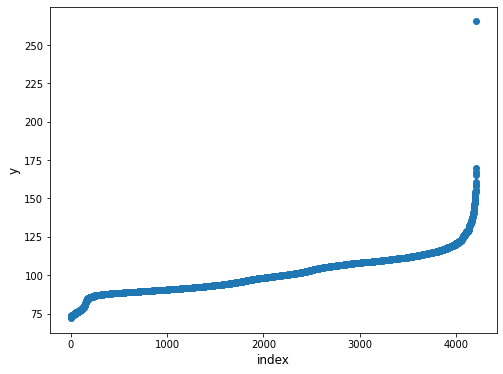

In [20]:
# "y" is the variable we need to predict. So we do some analysis on this variable first
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

# we are able to note that there is an outlier in y, that may affect our algorithim so it needs to be treated

<AxesSubplot:>

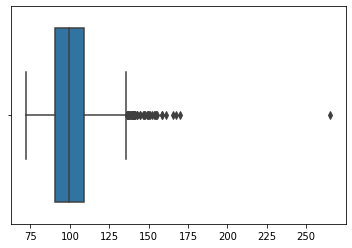

In [21]:
# checking ouliers with boxplot, this show more than one outlier, but we will aonly treat one
sns.boxplot(y_train)

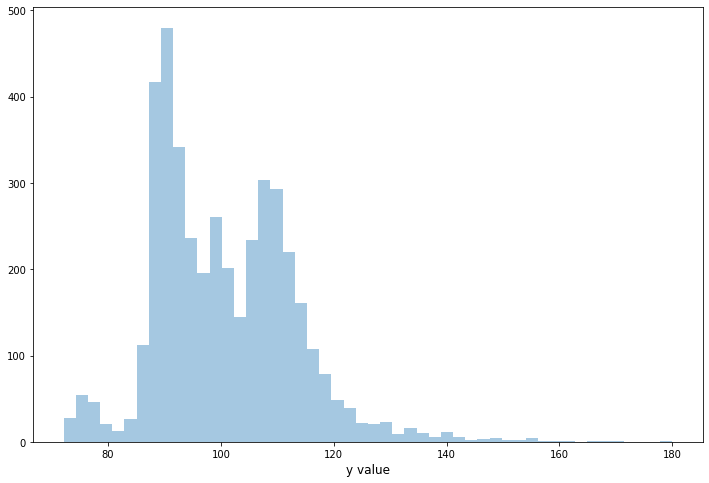

In [22]:
# ploting distribution graph of y before outlier removal
ulimit = 180
train_df['y'].loc[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [23]:
# treating the outliers in ['y'] 
y_train2 = train_df['y'].values <=175
y_train2

array([ True,  True,  True, ...,  True,  True,  True])

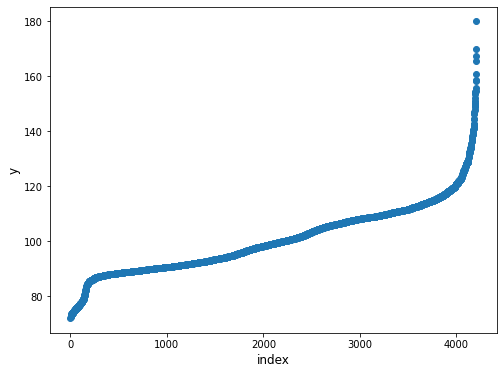

In [24]:
# checking if the outlier has been treated succesfull

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

# QUESTION 3 - APPLY LABEL ENCODER

In [25]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X359 to X272
dtypes: int64(356), object(8)
memory usage: 11.7+ MB


From this we come to know we have 8 columns with categorical data which needs to be label encoded

In [26]:
a = x_train
b= x_test

In [27]:
#label enocoder of train data
from sklearn import preprocessing , model_selection
for f in a.columns:
    if a[f].dtype =='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(a[f].values))
        a[f]= lbl.transform(list(a[f].values))

In [28]:
#label encoder of test data
for f in b.columns:
    if b[f].dtype =='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(b[f].values))
        b[f]= lbl.transform(list(b[f].values))

In [29]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X359 to X272
dtypes: int64(364)
memory usage: 11.7 MB


In [30]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X359 to X272
dtypes: int64(364)
memory usage: 11.7 MB


# Question 4 - Perform Dimensionality Reduction

In [31]:
from sklearn.decomposition import PCA
model = PCA(n_components=15)
model.fit(a)
transformed_x_train = model.transform(a)

In [32]:
transformed_x_train.shape

(4209, 15)

In [33]:
print("Explained variance: ", model.explained_variance_ratio_)

Explained variance:  [0.38334782 0.21388033 0.13261866 0.11826642 0.09206008 0.01590604
 0.0074454  0.00433701 0.00294021 0.00241796 0.00236488 0.00203229
 0.00167204 0.00148111 0.00128702]


# from the above code we see that over 92.2% of total variation in the data is explained by the 1st 5 PCA component.
# we could have limited n_components to 5 it would have been fine.
# [38.3%, 21.3%, 13.2%, 11.8%, 9.2%]

In [34]:
df_var = pd.DataFrame({'Variance': model.explained_variance_ratio_,
                      'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']})
df_var

,Variance,PC
0,0.383348,PC1
1,0.213880,PC2
2,0.132619,PC3
3,0.118266,PC4
4,0.092060,PC5
5,0.015906,PC6
6,0.007445,PC7
7,0.004337,PC8
8,0.002940,PC9
9,0.002418,PC10


<AxesSubplot:xlabel='PC', ylabel='Variance'>

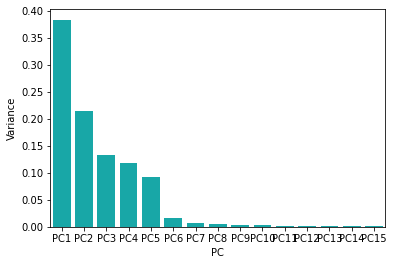

In [35]:
sns.barplot(x='PC',y='Variance', data= df_var, color='c')

In [36]:
# PCA on test Data [Transforming the test Data]
model.fit(b)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# transforming data to 15 dimensions or components
transformed_x_test = model.transform(b)
transformed_x_test.shape

(4209, 15)

# Question 5 Predict your test_df values using XGBoost

In [38]:
#test data with XGBOOST
import xgboost as xgb
xgb_classifier= xgb.XGBClassifier()
xgb_classifier.fit(transformed_x_train,y_train2)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [39]:
predictions = xgb_classifier.predict(transformed_x_test)
predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
from sklearn.metrics import accuracy_score
print('accuracy of model::',accuracy_score(y_train2,predictions))

accuracy of model:: 0.9997624138750297


In [41]:
#model buliding using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier()
model2.fit(transformed_x_train,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# evaluating the accuracy of the model
model2.score(transformed_x_test,y_train2)

0.9997624138750297

# Comparing both XGboost and Random Forest Classifier both give similar accuracy